In [16]:
# weighting the data for equal populations makes the avg earned income for men and women closer, 
#but there is still a huge gulf
# the no income women are skewing the table, 
# especially for bachelors degree holders



%matplotlib notebook
# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [17]:
# filepaths
edattain_income = "../Resources/ca-educational-attainment-personal-income-2008-2014.csv"


In [18]:
#dataframes
edattain_income_df = pd.read_csv(edattain_income, encoding="utf-8")


In [19]:
#clean out age

#no age filter
#over_17 = edattain_income_df

#over 17 data
#over_17 = edattain_income_df[edattain_income_df.Age != '00 to 17']

# create a data set for age 18 to 64 for the year 2014
over_17 = edattain_income_df.loc[(edattain_income_df['Age'] == '18 to 64') & 
            (edattain_income_df['Year'] == '01/01/2014 12:00:00 AM')]

year = "01/01/2014 12:00:00 AM"


In [20]:
# create a male and female set for age 18 to 64 for the year 2014


over_17M = over_17.loc[over_17['Gender'] == 'Male']
over_17F = over_17.loc[over_17['Gender'] == 'Female']


#over_17 is male
# over_17F is female



In [21]:
# create list of male population for no high school for each personal income

no_hsM = []
no_income_2014 = over_17M.loc[(over_17M['Personal Income'] == 'No Income') & 
            (over_17M['Educational Attainment'] == 'No high school diploma') &
            (over_17M['Year'] == year) ]
no_hsM.append(no_income_2014['Population Count'].sum())

no_income_2014 = over_17M.loc[(over_17M['Personal Income'] == '$5,000 to $9,999') & 
            (over_17M['Educational Attainment'] == 'No high school diploma') &
            (over_17M['Year'] == year) ]
no_hsM.append(no_income_2014['Population Count'].sum())

no_income_2014 = over_17M.loc[(over_17M['Personal Income'] == '$10,000 to $14,999') & 
            (over_17M['Educational Attainment'] == 'No high school diploma') &
            (over_17M['Year'] == year) ]
no_hsM.append(no_income_2014['Population Count'].sum())

no_income_2014 = over_17M.loc[(over_17M['Personal Income'] == '$15,000 to $24,999') & 
            (over_17M['Educational Attainment'] == 'No high school diploma') &
            (over_17M['Year'] == year) ]
no_hsM.append(no_income_2014['Population Count'].sum())

no_income_2014 = over_17M.loc[(over_17M['Personal Income'] == '$25,000 to $34,999') & 
            (over_17M['Educational Attainment'] == 'No high school diploma') &
            (over_17M['Year'] == year) ]
no_hsM.append(no_income_2014['Population Count'].sum())

no_income_2014 = over_17M.loc[(over_17M['Personal Income'] == '$35,000 to $49,999') & 
            (over_17M['Educational Attainment'] == 'No high school diploma') &
            (over_17M['Year'] == year) ]
no_hsM.append(no_income_2014['Population Count'].sum())

no_income_2014 = over_17M.loc[(over_17M['Personal Income'] == '$50,000 to $74,999') & 
            (over_17M['Educational Attainment'] == 'No high school diploma') &
            (over_17M['Year'] == year) ]
no_hsM.append(no_income_2014['Population Count'].sum())

no_income_2014 = over_17M.loc[(over_17M['Personal Income'] == '$75,000 and over') & 
            (over_17M['Educational Attainment'] == 'No high school diploma') &
            (over_17M['Year'] == year) ]
no_hsM.append(no_income_2014['Population Count'].sum())



In [22]:
# create list of female population for no high school for each personal income

no_hsF = []
no_income_2014 = over_17F.loc[(over_17F['Personal Income'] == 'No Income') & 
            (over_17F['Educational Attainment'] == 'No high school diploma') &
            (over_17F['Year'] == year) ]
no_hsF.append(no_income_2014['Population Count'].sum())

no_income_2014 = over_17F.loc[(over_17F['Personal Income'] == '$5,000 to $9,999') & 
            (over_17F['Educational Attainment'] == 'No high school diploma') &
            (over_17F['Year'] == year) ]
no_hsF.append(no_income_2014['Population Count'].sum())

no_income_2014 = over_17F.loc[(over_17F['Personal Income'] == '$10,000 to $14,999') & 
            (over_17F['Educational Attainment'] == 'No high school diploma') &
            (over_17F['Year'] == year) ]
no_hsF.append(no_income_2014['Population Count'].sum())

no_income_2014 = over_17F.loc[(over_17F['Personal Income'] == '$15,000 to $24,999') & 
            (over_17F['Educational Attainment'] == 'No high school diploma') &
            (over_17F['Year'] == year) ]
no_hsF.append(no_income_2014['Population Count'].sum())

no_income_2014 = over_17F.loc[(over_17F['Personal Income'] == '$25,000 to $34,999') & 
            (over_17F['Educational Attainment'] == 'No high school diploma') &
            (over_17F['Year'] == year) ]
no_hsF.append(no_income_2014['Population Count'].sum())

no_income_2014 = over_17F.loc[(over_17F['Personal Income'] == '$35,000 to $49,999') & 
            (over_17F['Educational Attainment'] == 'No high school diploma') &
            (over_17F['Year'] == year) ]
no_hsF.append(no_income_2014['Population Count'].sum())

no_income_2014 = over_17F.loc[(over_17F['Personal Income'] == '$50,000 to $74,999') & 
            (over_17F['Educational Attainment'] == 'No high school diploma') &
            (over_17F['Year'] == year) ]
no_hsF.append(no_income_2014['Population Count'].sum())

no_income_2014 = over_17F.loc[(over_17F['Personal Income'] == '$75,000 and over') & 
            (over_17F['Educational Attainment'] == 'No high school diploma') &
            (over_17F['Year'] == year) ]
no_hsF.append(no_income_2014['Population Count'].sum())





In [88]:

#find coefficient to weight the genders equally for n-_hs
no_hs_numM = sum(no_hsM)
no_hs_numF = sum(no_hsF)
no_hs_coeff = no_hs_numF/no_hs_numM
print (no_hs_coeff)
no_hs_coeff

#revise the men's populations for no_hs with the coefficient

weighted_no_hsM = []
for x in range(0,8):
    
    weighted= no_hsM[x] * no_hs_coeff
    weighted_no_hsM.append(weighted)
W_no_hsM = np.array(weighted_no_hsM).round(0)   
print(no_hsM, W_no_hsM)   

0.8615285570448447
[376783.0, 158572.0, 231957.0, 460129.0, 288460.0, 194888.0, 104646.0, 54734.0] [324609. 136614. 199838. 396414. 248517. 167902.  90156.  47155.]


In [24]:
# create a dataframe with the weighted gender  data
No_income= {"Male": W_no_hsM[0], "Female": no_hsF[0]}
Inc1= {"Male": W_no_hsM[1], "Female": no_hsF[1]}
Inc2= {"Male": W_no_hsM[2], "Female": no_hsF[2]}
Inc3= {"Male": W_no_hsM[3], "Female": no_hsF[3]}
Inc4= {"Male": W_no_hsM[4], "Female": no_hsF[4]}
Inc5= {"Male": W_no_hsM[5], "Female": no_hsF[5]}
Inc6= {"Male": W_no_hsM[6], "Female": no_hsF[6]}
Inc7= {"Male": W_no_hsM[7], "Female": no_hsF[7]}

df =pd.DataFrame([
{"no income": W_no_hsM[0], "1": W_no_hsM[1], "2": W_no_hsM[2], "3": W_no_hsM[3], "4": W_no_hsM[4], 
 "5": W_no_hsM[5],
 "6": W_no_hsM[6], "7": W_no_hsM[7]},
{"no income": no_hsF[0], "1": no_hsF[1], "2": no_hsF[2], "3": no_hsF[3], "4": no_hsF[4],
 "5": no_hsF[5], "6": no_hsF[6], "7": no_hsF[7]}],
index=["Male", "Female"])
df

,no income,1,2,3,4,5,6,7
Male,324609.0,136614.0,199838.0,396414.0,248517.0,167902.0,90156.0,47155.0
Female,723208.0,239883.0,189839.0,277974.0,120389.0,43218.0,14635.0,2058.0


In [25]:
df2=df.transpose()

df2


,Male,Female
no income,324609.0,723208.0
1,136614.0,239883.0
2,199838.0,189839.0
3,396414.0,277974.0
4,248517.0,120389.0
5,167902.0,43218.0
6,90156.0,14635.0
7,47155.0,2058.0


In [26]:
critical_value = stats.chi2.ppf(q = 0.95, df = 7)
critical_value

14.067140449340169

In [27]:
stats.chisquare(df2['Male'], df2['Female'])

Power_divergenceResult(statistic=2189139.069474661, pvalue=0.0)

In [28]:
#create a list of Male population for high school education by income
hsM = []
no_income_2014 = over_17M.loc[(over_17M['Personal Income'] == 'No Income') & 
            (over_17M['Educational Attainment'] == 'High school or equivalent') &
            (over_17M['Year'] == year) ]
hsM.append(no_income_2014['Population Count'].sum())

no_income_2014 = over_17M.loc[(over_17M['Personal Income'] == '$5,000 to $9,999') & 
            (over_17M['Educational Attainment'] == 'High school or equivalent') &
            (over_17M['Year'] == year) ]
hsM.append(no_income_2014['Population Count'].sum())

no_income_2014 = over_17M.loc[(over_17M['Personal Income'] == '$10,000 to $14,999') & 
            (over_17M['Educational Attainment'] == 'High school or equivalent') &
            (over_17M['Year'] == year) ]
hsM.append(no_income_2014['Population Count'].sum())

no_income_2014 = over_17.loc[(over_17['Personal Income'] == '$15,000 to $24,999') & 
            (over_17['Educational Attainment'] == 'High school or equivalent') &
            (over_17['Year'] == year) ]
hsM.append(no_income_2014['Population Count'].sum())

no_income_2014 = over_17M.loc[(over_17M['Personal Income'] == '$25,000 to $34,999') & 
            (over_17M['Educational Attainment'] == 'High school or equivalent') &
            (over_17M['Year'] == year) ]
hsM.append(no_income_2014['Population Count'].sum())

no_income_2014 = over_17M.loc[(over_17M['Personal Income'] == '$35,000 to $49,999') & 
            (over_17M['Educational Attainment'] == 'High school or equivalent') &
            (over_17M['Year'] == year) ]
hsM.append(no_income_2014['Population Count'].sum())

no_income_2014 = over_17M.loc[(over_17M['Personal Income'] == '$50,000 to $74,999') & 
            (over_17M['Educational Attainment'] == 'High school or equivalent') &
            (over_17M['Year'] == year) ]
hsM.append(no_income_2014['Population Count'].sum())

no_income_2014 = over_17M.loc[(over_17M['Personal Income'] == '$75,000 and over') & 
            (over_17M['Educational Attainment'] == 'High school or equivalent') &
            (over_17M['Year'] == year) ]
hsM.append(no_income_2014['Population Count'].sum())


hsM



[405204.0,
 238754.0,
 200365.0,
 974012.0,
 467906.0,
 418051.0,
 322511.0,
 227515.0]

In [29]:
#create a  list of Female population for high school education by income
hsF = []
no_income_2014 = over_17F.loc[(over_17F['Personal Income'] == 'No Income') & 
            (over_17F['Educational Attainment'] == 'High school or equivalent') &
            (over_17F['Year'] == year) ]
hsF.append(no_income_2014['Population Count'].sum())

no_income_2014 = over_17F.loc[(over_17F['Personal Income'] == '$5,000 to $9,999') & 
            (over_17F['Educational Attainment'] == 'High school or equivalent') &
            (over_17F['Year'] == year) ]
hsF.append(no_income_2014['Population Count'].sum())

no_income_2014 = over_17F.loc[(over_17F['Personal Income'] == '$10,000 to $14,999') & 
            (over_17F['Educational Attainment'] == 'High school or equivalent') &
            (over_17F['Year'] == year) ]
hsF.append(no_income_2014['Population Count'].sum())

no_income_2014 = over_17.loc[(over_17['Personal Income'] == '$15,000 to $24,999') & 
            (over_17['Educational Attainment'] == 'High school or equivalent') &
            (over_17['Year'] == year) ]
hsF.append(no_income_2014['Population Count'].sum())

no_income_2014 = over_17F.loc[(over_17F['Personal Income'] == '$25,000 to $34,999') & 
            (over_17F['Educational Attainment'] == 'High school or equivalent') &
            (over_17F['Year'] == year) ]
hsF.append(no_income_2014['Population Count'].sum())

no_income_2014 = over_17F.loc[(over_17F['Personal Income'] == '$35,000 to $49,999') & 
            (over_17F['Educational Attainment'] == 'High school or equivalent') &
            (over_17F['Year'] == year) ]
hsF.append(no_income_2014['Population Count'].sum())

no_income_2014 = over_17F.loc[(over_17F['Personal Income'] == '$50,000 to $74,999') & 
            (over_17F['Educational Attainment'] == 'High school or equivalent') &
            (over_17F['Year'] == year) ]
hsF.append(no_income_2014['Population Count'].sum())

no_income_2014 = over_17F.loc[(over_17F['Personal Income'] == '$75,000 and over') & 
            (over_17F['Educational Attainment'] == 'High school or equivalent') &
            (over_17F['Year'] == year) ]
hsF.append(no_income_2014['Population Count'].sum())


hsF



[670294.0, 266348.0, 272824.0, 974012.0, 318868.0, 245318.0, 128589.0, 52375.0]

In [30]:
#find coefficient to weight the genders equally hs
hs_numM = sum(hsM)
hs_numF = sum(hsF)
hs_coeff = hs_numF/hs_numM
hs_coeff

#revise the men's populations for hs with the coefficient

weighted_hsM = []
for x in range(0,8):
    
    weighted= hsM[x] * hs_coeff
    weighted_hsM.append(weighted)
W_hsM = np.array(weighted_hsM).round(0)   
print(hsM, W_hsM) 

[405204.0, 238754.0, 200365.0, 974012.0, 467906.0, 418051.0, 322511.0, 227515.0] [364651. 214860. 180313. 876534. 421078. 376213. 290234. 204745.]


In [31]:
#create a list of male population for some college by income
some_colM = []
no_income_2014 = over_17M.loc[(over_17M['Personal Income'] == 'No Income') & 
            (over_17M['Educational Attainment'] == 'Some college, less than 4-yr degree') &
            (over_17M['Year'] == year) ]
some_colM.append(no_income_2014['Population Count'].sum())

no_income_2014 = over_17M.loc[(over_17M['Personal Income'] == '$5,000 to $9,999') & 
            (over_17M['Educational Attainment'] == 'Some college, less than 4-yr degree') &
            (over_17M['Year'] == year) ]
some_colM.append(no_income_2014['Population Count'].sum())

no_income_2014 = over_17M.loc[(over_17M['Personal Income'] == '$10,000 to $14,999') & 
            (over_17M['Educational Attainment'] == 'Some college, less than 4-yr degree') &
            (over_17M['Year'] == year) ]
some_colM.append(no_income_2014['Population Count'].sum())

no_income_2014 = over_17M.loc[(over_17M['Personal Income'] == '$15,000 to $24,999') & 
            (over_17M['Educational Attainment'] == 'Some college, less than 4-yr degree') &
            (over_17M['Year'] == year) ]
some_colM.append(no_income_2014['Population Count'].sum())

no_income_2014 = over_17M.loc[(over_17M['Personal Income'] == '$25,000 to $34,999') & 
            (over_17M['Educational Attainment'] == 'Some college, less than 4-yr degree') &
            (over_17M['Year'] == year) ]
some_colM.append(no_income_2014['Population Count'].sum())

no_income_2014 = over_17M.loc[(over_17M['Personal Income'] == '$35,000 to $49,999') & 
            (over_17M['Educational Attainment'] == 'Some college, less than 4-yr degree') &
            (over_17M['Year'] == year) ]
some_colM.append(no_income_2014['Population Count'].sum())

no_income_2014 = over_17M.loc[(over_17M['Personal Income'] == '$50,000 to $74,999') & 
            (over_17M['Educational Attainment'] == 'Some college, less than 4-yr degree') &
            (over_17M['Year'] == year) ]
some_colM.append(no_income_2014['Population Count'].sum())

no_income_2014 = over_17M.loc[(over_17M['Personal Income'] == '$75,000 and over') & 
            (over_17M['Educational Attainment'] == 'Some college, less than 4-yr degree') &
            (over_17M['Year'] == year) ]
some_colM.append(no_income_2014['Population Count'].sum())


some_colM



[343156.0,
 255129.0,
 278291.0,
 556174.0,
 371185.0,
 495675.0,
 423087.0,
 495187.0]

In [32]:
#create a female  population for some college by income
some_colF = []
no_income_2014 = over_17F.loc[(over_17F['Personal Income'] == 'No Income') & 
            (over_17F['Educational Attainment'] == 'Some college, less than 4-yr degree') &
            (over_17F['Year'] == year) ]
some_colF.append(no_income_2014['Population Count'].sum())

no_income_2014 = over_17F.loc[(over_17F['Personal Income'] == '$5,000 to $9,999') & 
            (over_17F['Educational Attainment'] == 'Some college, less than 4-yr degree') &
            (over_17F['Year'] == year) ]
some_colF.append(no_income_2014['Population Count'].sum())

no_income_2014 = over_17F.loc[(over_17F['Personal Income'] == '$10,000 to $14,999') & 
            (over_17F['Educational Attainment'] == 'Some college, less than 4-yr degree') &
            (over_17F['Year'] == year) ]
some_colF.append(no_income_2014['Population Count'].sum())

no_income_2014 = over_17F.loc[(over_17F['Personal Income'] == '$15,000 to $24,999') & 
            (over_17F['Educational Attainment'] == 'Some college, less than 4-yr degree') &
            (over_17F['Year'] == year) ]
some_colF.append(no_income_2014['Population Count'].sum())

no_income_2014 = over_17F.loc[(over_17F['Personal Income'] == '$25,000 to $34,999') & 
            (over_17F['Educational Attainment'] == 'Some college, less than 4-yr degree') &
            (over_17F['Year'] == year) ]
some_colF.append(no_income_2014['Population Count'].sum())

no_income_2014 = over_17F.loc[(over_17F['Personal Income'] == '$35,000 to $49,999') & 
            (over_17F['Educational Attainment'] == 'Some college, less than 4-yr degree') &
            (over_17F['Year'] == year) ]
some_colF.append(no_income_2014['Population Count'].sum())

no_income_2014 = over_17F.loc[(over_17F['Personal Income'] == '$50,000 to $74,999') & 
            (over_17F['Educational Attainment'] == 'Some college, less than 4-yr degree') &
            (over_17F['Year'] == year) ]
some_colF.append(no_income_2014['Population Count'].sum())

no_income_2014 = over_17F.loc[(over_17F['Personal Income'] == '$75,000 and over') & 
            (over_17F['Educational Attainment'] == 'Some college, less than 4-yr degree') &
            (over_17F['Year'] == year) ]
some_colF.append(no_income_2014['Population Count'].sum())


print(some_colF,some_colM)



[581907.0, 404151.0, 389764.0, 483518.0, 528017.0, 469153.0, 344454.0, 155579.0] [343156.0, 255129.0, 278291.0, 556174.0, 371185.0, 495675.0, 423087.0, 495187.0]


In [33]:
# find a coefficient to weight the genderds for some college
some_colnumM = sum(some_colM)
some_colnumF = sum(some_colF)
some_col_coeff = some_colnumF/some_colnumM
print(some_col_coeff)

#revise the men's populations for some college with the coefficient

weighted_some_colM = []
for x in range(0,8):
    
    weighted= some_colM[x] * some_col_coeff
    weighted_some_colM.append(weighted)
W_some_colM = np.array(weighted_some_colM).round(0)   
print(some_colM, W_some_colM)

1.0430901176052338
[343156.0, 255129.0, 278291.0, 556174.0, 371185.0, 495675.0, 423087.0, 495187.0] [357943. 266123. 290283. 580140. 387179. 517034. 441318. 516525.]


In [50]:
#create list of bachelors degree by income for men
bachM = []
no_income_2014 = over_17M.loc[(over_17M['Personal Income'] == 'No Income') & 
            (over_17M['Educational Attainment'] == "Bachelor's degree or higher") &
            (over_17M['Year'] == year) ]
bachM.append(no_income_2014['Population Count'].sum())

no_income_2014 = over_17M.loc[(over_17M['Personal Income'] == '$5,000 to $9,999') & 
            (over_17M['Educational Attainment'] == "Bachelor's degree or higher") &
            (over_17M['Year'] == year) ]
bachM.append(no_income_2014['Population Count'].sum())

no_income_2014 = over_17M.loc[(over_17M['Personal Income'] == '$10,000 to $14,999') & 
            (over_17M['Educational Attainment'] == "Bachelor's degree or higher") &
            (over_17M['Year'] == year) ]
bachM.append(no_income_2014['Population Count'].sum())

no_income_2014 = over_17M.loc[(over_17M['Personal Income'] == '$15,000 to $24,999') & 
            (over_17M['Educational Attainment'] == "Bachelor's degree or higher") &
            (over_17M['Year'] == year) ]
bachM.append(no_income_2014['Population Count'].sum())

no_income_2014 = over_17M.loc[(over_17M['Personal Income'] == '$25,000 to $34,999') & 
            (over_17M['Educational Attainment'] == "Bachelor's degree or higher") &
            (over_17M['Year'] == year) ]
bachM.append(no_income_2014['Population Count'].sum())

no_income_2014 = over_17M.loc[(over_17M['Personal Income'] == '$35,000 to $49,999') & 
            (over_17M['Educational Attainment'] == "Bachelor's degree or higher") &
            (over_17M['Year'] == year) ]
bachM.append(no_income_2014['Population Count'].sum())

no_income_2014 = over_17M.loc[(over_17M['Personal Income'] == '$50,000 to $74,999') & 
            (over_17M['Educational Attainment'] == "Bachelor's degree or higher") &
            (over_17M['Year'] == year) ]
bachM.append(no_income_2014['Population Count'].sum())

no_income_2014 = over_17M.loc[(over_17M['Personal Income'] == '$75,000 and over') & 
            (over_17M['Educational Attainment'] == "Bachelor's degree or higher") &
            (over_17M['Year'] == year) ]
bachM.append(no_income_2014['Population Count'].sum())


bachM


[181482.0,
 86481.0,
 104462.0,
 233954.0,
 218789.0,
 357532.0,
 682425.0,
 1628605.0]

In [51]:
# make a list of bach degree female only

bachF = []
no_income_2014 = over_17F.loc[(over_17F['Personal Income'] == 'No Income') & 
            (over_17F['Educational Attainment'] == "Bachelor's degree or higher") &
            (over_17F['Year'] == year) ]
bachF.append(no_income_2014['Population Count'].sum())

no_income_2014 = over_17F.loc[(over_17F['Personal Income'] == '$5,000 to $9,999') & 
            (over_17F['Educational Attainment'] == "Bachelor's degree or higher") &
            (over_17F['Year'] == year) ]
bachF.append(no_income_2014['Population Count'].sum())

no_income_2014 = over_17F.loc[(over_17F['Personal Income'] == '$10,000 to $14,999') & 
            (over_17F['Educational Attainment'] == "Bachelor's degree or higher") &
            (over_17F['Year'] == year) ]
bachF.append(no_income_2014['Population Count'].sum())

no_income_2014 = over_17F.loc[(over_17F['Personal Income'] == '$15,000 to $24,999') & 
            (over_17F['Educational Attainment'] == "Bachelor's degree or higher") &
            (over_17F['Year'] == year) ]
bachF.append(no_income_2014['Population Count'].sum())

no_income_2014 = over_17F.loc[(over_17F['Personal Income'] == '$25,000 to $34,999') & 
            (over_17F['Educational Attainment'] == "Bachelor's degree or higher") &
            (over_17F['Year'] == year) ]
bachF.append(no_income_2014['Population Count'].sum())

no_income_2014 = over_17F.loc[(over_17F['Personal Income'] == '$35,000 to $49,999') & 
            (over_17F['Educational Attainment'] == "Bachelor's degree or higher") &
            (over_17F['Year'] == year) ]
bachF.append(no_income_2014['Population Count'].sum())

no_income_2014 = over_17F.loc[(over_17F['Personal Income'] == '$50,000 to $74,999') & 
            (over_17F['Educational Attainment'] == "Bachelor's degree or higher") &
            (over_17F['Year'] == year) ]
bachF.append(no_income_2014['Population Count'].sum())

no_income_2014 = over_17F.loc[(over_17F['Personal Income'] == '$75,000 and over') & 
            (over_17F['Educational Attainment'] == "Bachelor's degree or higher") &
            (over_17F['Year'] == year) ]
bachF.append(no_income_2014['Population Count'].sum())
bachF

[359264.0,
 148975.0,
 206941.0,
 352744.0,
 340611.0,
 531019.0,
 660048.0,
 953282.0]

In [63]:
# #ceate a weighted mens bach population
# bach_numM = sum(bachM)
# bach_numF = sum(bachF)
# bach_coeff = bach_numF/bach_numM
# print(bach_coeff)

# #revise the men's populations for bach with the coefficient

weighted_bachM = []
for x in range(0,8):
    
    weighted= bachM[x] * bach_coeff
    weighted_bachM.append(weighted)
W_bachM = np.array(weighted_bachM).round(0)   
print(bachM, W_bachM) 

[181482.0, 86481.0, 104462.0, 233954.0, 218789.0, 357532.0, 682425.0, 1628605.0] [ 184555.   87945.  106231.  237915.  222493.  363586.  693979. 1656180.]


In [74]:
# create a dataframe with the bachelors data and check for statistical significance
# Power_divergenceResult(statistic=3387743.5774105894, pvalue=0.0)


# No_income= {"Male": W_bachM[0], "Female": bachF[0]}
# Inc1= {"Male": W_bachM[1], "Female": bachF[1]}
# Inc2= {"Male": W_bachM[2], "Female": bachF[2]}
# Inc3= {"Male": W_bachM[3], "Female": bachF[3]}
# Inc4= {"Male": W_bachM[4], "Female": bachF[4]}
# Inc5= {"Male": W_bachM[5], "Female": bachF[5]}
# Inc6= {"Male": W_bachM[6], "Female": bachF[6]}
# Inc7= {"Male": W_bachM[7], "Female": bachF[7]}

# df =pd.DataFrame([
# {"no income": W_bachM[0], "$5,000 to $9,999": W_bachM[1], "$10,000 to $14,999": W_bachM[2],
#  "$15,000 to $24,999": W_bachM[3], "$25,000 to $34,999": W_bachM[4], 
#  "$35,000 to $49,999": W_bachM[5], "$50,000 to $74,999": W_bachM[6], "$75,000 and over": W_bachM[7]},
    
# {"no income": bachF[0], "$5,000 to $9,999": bachF[1], "$10,000 to $14,999": bachF[2], 
#  "$15,000 to $24,999": bachF[3], "$25,000 to $34,999": bachF[4], 
#  "$35,000 to $49,999": bachF[5], "$50,000 to $74,999": bachF[6], "$75,000 and over": bachF[7]}],
# index=["Male", "Female"])
# df

In [105]:
# for an unweighted data frame
df =pd.DataFrame([
{"no income": bachM[0], "$5,000 to $9,999": bachM[1], "$10,000 to $14,999": bachM[2],
 "$15,000 to $24,999": bachM[3], "$25,000 to $34,999": bachM[4], 
 "$35,000 to $49,999": bachM[5], "$50,000 to $74,999": bachM[6], "$75,000 and over": bachM[7]},
    
{"no income": bachF[0], "$5,000 to $9,999": bachF[1], "$10,000 to $14,999": bachF[2], 
 "$15,000 to $24,999": bachF[3], "$25,000 to $34,999": bachF[4], 
 "$35,000 to $49,999": bachF[5], "$50,000 to $74,999": bachF[6], "$75,000 and over": bachF[7]}],
index=["Male", "Female"])
df

,no income,"$5,000 to $9,999","$10,000 to $14,999","$15,000 to $24,999","$25,000 to $34,999","$35,000 to $49,999","$50,000 to $74,999","$75,000 and over"
Male,181482.0,86481.0,104462.0,233954.0,218789.0,357532.0,682425.0,1628605.0
Female,359264.0,148975.0,206941.0,352744.0,340611.0,531019.0,660048.0,953282.0


In [106]:
# df2=df.transpose()


# tfile = open('BAch_chi_test_unweighted.txt', 'a')
# tfile.write(df2.to_string())
# tfile.close()
# df2

In [107]:
critical_value = stats.chi2.ppf(q = 0.95, df = 7)
critical_value

14.067140449340169

In [110]:
stats.chisquare(df["no income"], df["$5,000 to $9,999"], df["$10,000 to $14,999", df["$15,000 to $24,999"],
df["25,000 to $34,999"], df["$35,000 to $49,999"], df["$50,000 to $74,999"], df["$75,000 and over"], None)

SyntaxError: invalid syntax (<ipython-input-110-c09e1665ed1f>, line 2)

In [80]:
# #remove no income, 5-10 k from chi test. reults are lower, but stil 700k +
# df =pd.DataFrame([
# {"$10,000 to $14,999": W_bachM[2],
#  "$15,000 to $24,999": W_bachM[3], "$25,000 to $34,999": W_bachM[4], 
#  "$35,000 to $49,999": W_bachM[5], "$50,000 to $74,999": W_bachM[6], "$75,000 and over": W_bachM[7]},
    
# {"$10,000 to $14,999": bachF[2], 
#  "$15,000 to $24,999": bachF[3], "$25,000 to $34,999": bachF[4], 
#  "$35,000 to $49,999": bachF[5], "$50,000 to $74,999": bachF[6], "$75,000 and over": bachF[7]}],
# index=["Male", "Female"])
# df


In [81]:
df2=df.transpose()

df2

,Male,Female
no income,181482.0,359264.0
"$5,000 to $9,999",86481.0,148975.0
"$10,000 to $14,999",104462.0,206941.0
"$15,000 to $24,999",233954.0,352744.0
"$25,000 to $34,999",218789.0,340611.0
"$35,000 to $49,999",357532.0,531019.0
"$50,000 to $74,999",682425.0,660048.0
"$75,000 and over",1628605.0,953282.0


In [82]:
critical_value = stats.chi2.ppf(q = 0.95, df = 7)
critical_value

14.067140449340169

In [83]:
stats.chisquare(df2['Male'], df2['Female'])

Power_divergenceResult(statistic=784363.4829872872, pvalue=0.0)

<IPython.core.display.Javascript object>


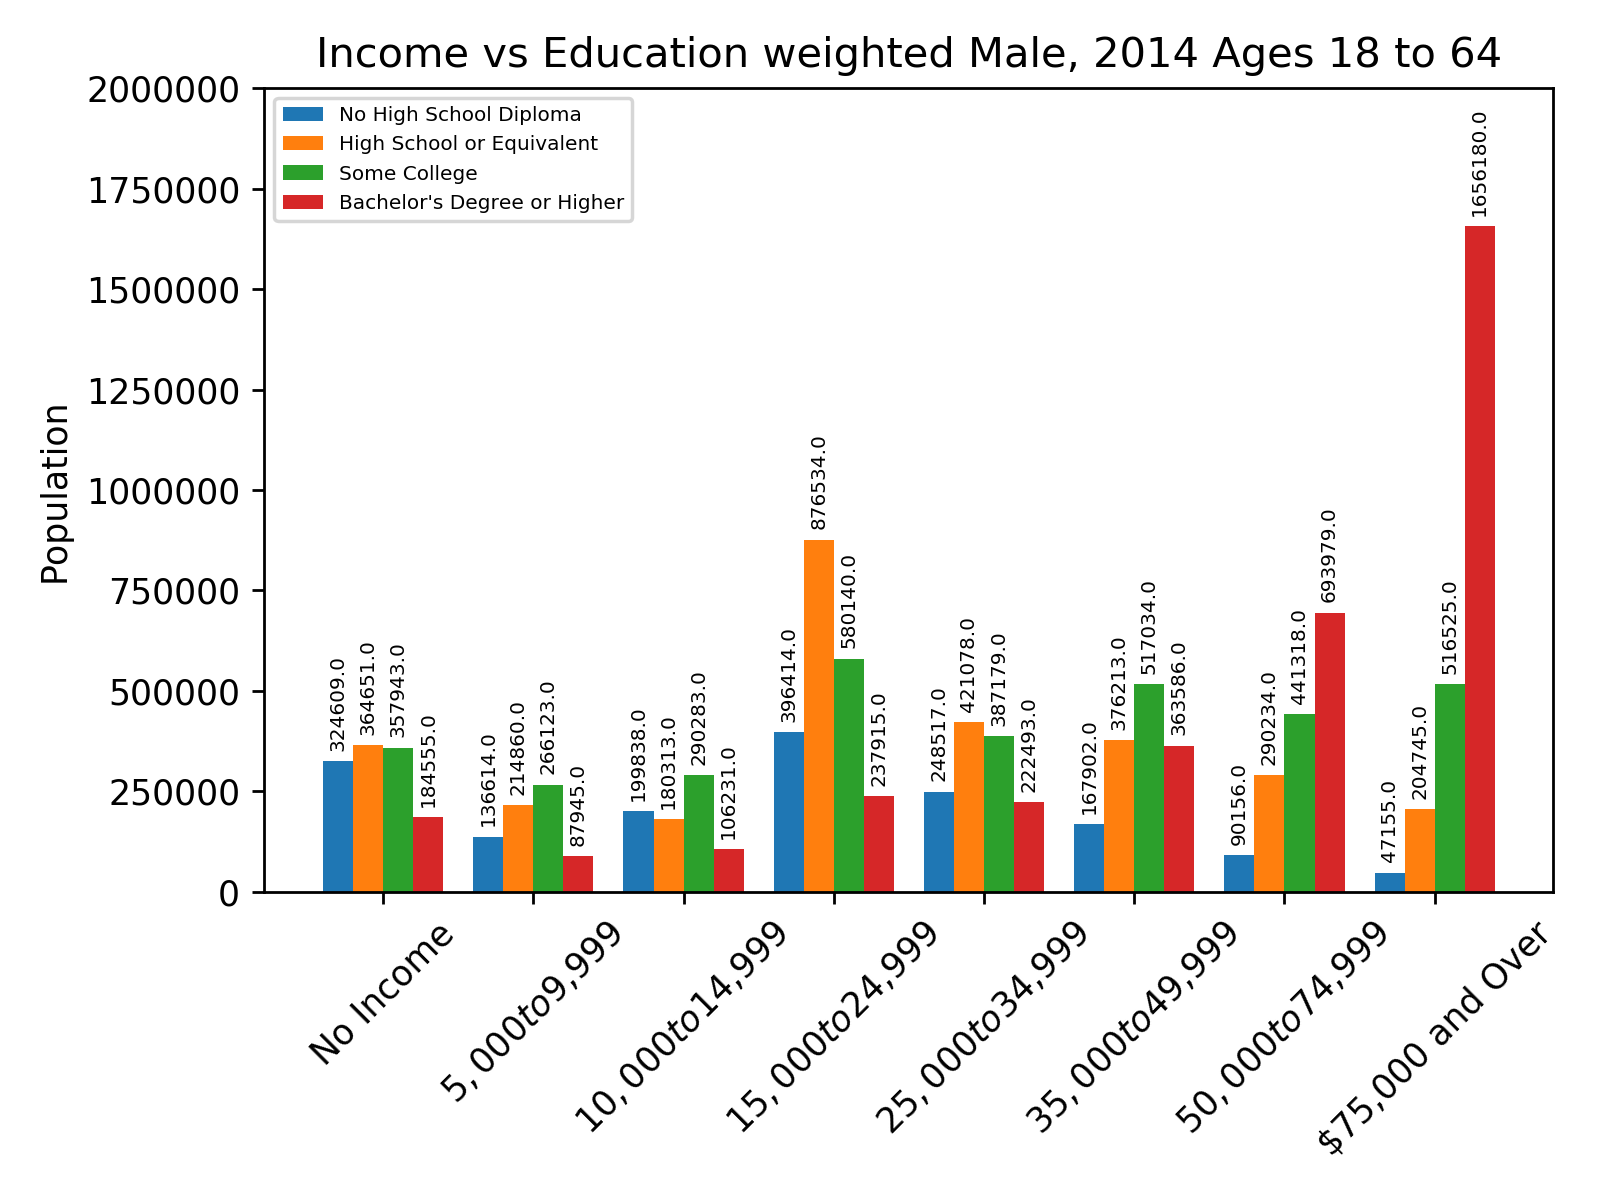

In [123]:
#create A bar graph based off model found on https://matplotlib.org/index.html

labels = ['No Income', '$5,000 to $9,999', '$10,000 to $14,999','$15,000 to $24,999',
          '$25,000 to $34,999', '$35,000 to $49,999', '$50,000 to $74,999', '$75,000 and Over']


x = np.arange(len(labels))  # the label locations
width = 0.40  # the width of the bars


fig, ax = plt.subplots()
rects1 = ax.bar(x - .3, W_no_hsM, .2, label='No High School Diploma')
rects2 = ax.bar(x - .1, W_hsM, .2, label='High School or Equivalent')
rects3 = ax.bar(x + .1, W_some_colM, .2, label='Some College')
rects4 = ax.bar(x + .3, W_bachM, .2, label="Bachelor's Degree or Higher")

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Population')
ax.set_title('Income vs Education weighted Male, 2014 Ages 18 to 64')
ax.set_xticks(x)
ax.set_xticklabels(labels)
#ax.set_ylimit([0,2500000]

ax.legend(loc='upper left', fontsize='xx-small')
plt.xticks(rotation=45)

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', rotation = '90',fontsize='xx-small')


autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)

plt.ylim(0, 2000000)
fig.tight_layout()
fig.savefig("output_education_and_income_Male_2014")
plt.show()

In [ ]:
# does graduating college actually give you more money.  statistical analysis
#how income level changed for college from 2008 to 2014
#how has income level changed for no college from 2008 to 2014
#filter out over 65 to see how that affects it
#Brendan -- Trends in income for each educational level over time (line chart) → (Statistical analysis -- does a college degree make a significant difference in your income level? Maybe do with the larger dataset bc it gives the actual income for each job )
#maybe use census data for all of this....

<IPython.core.display.Javascript object>


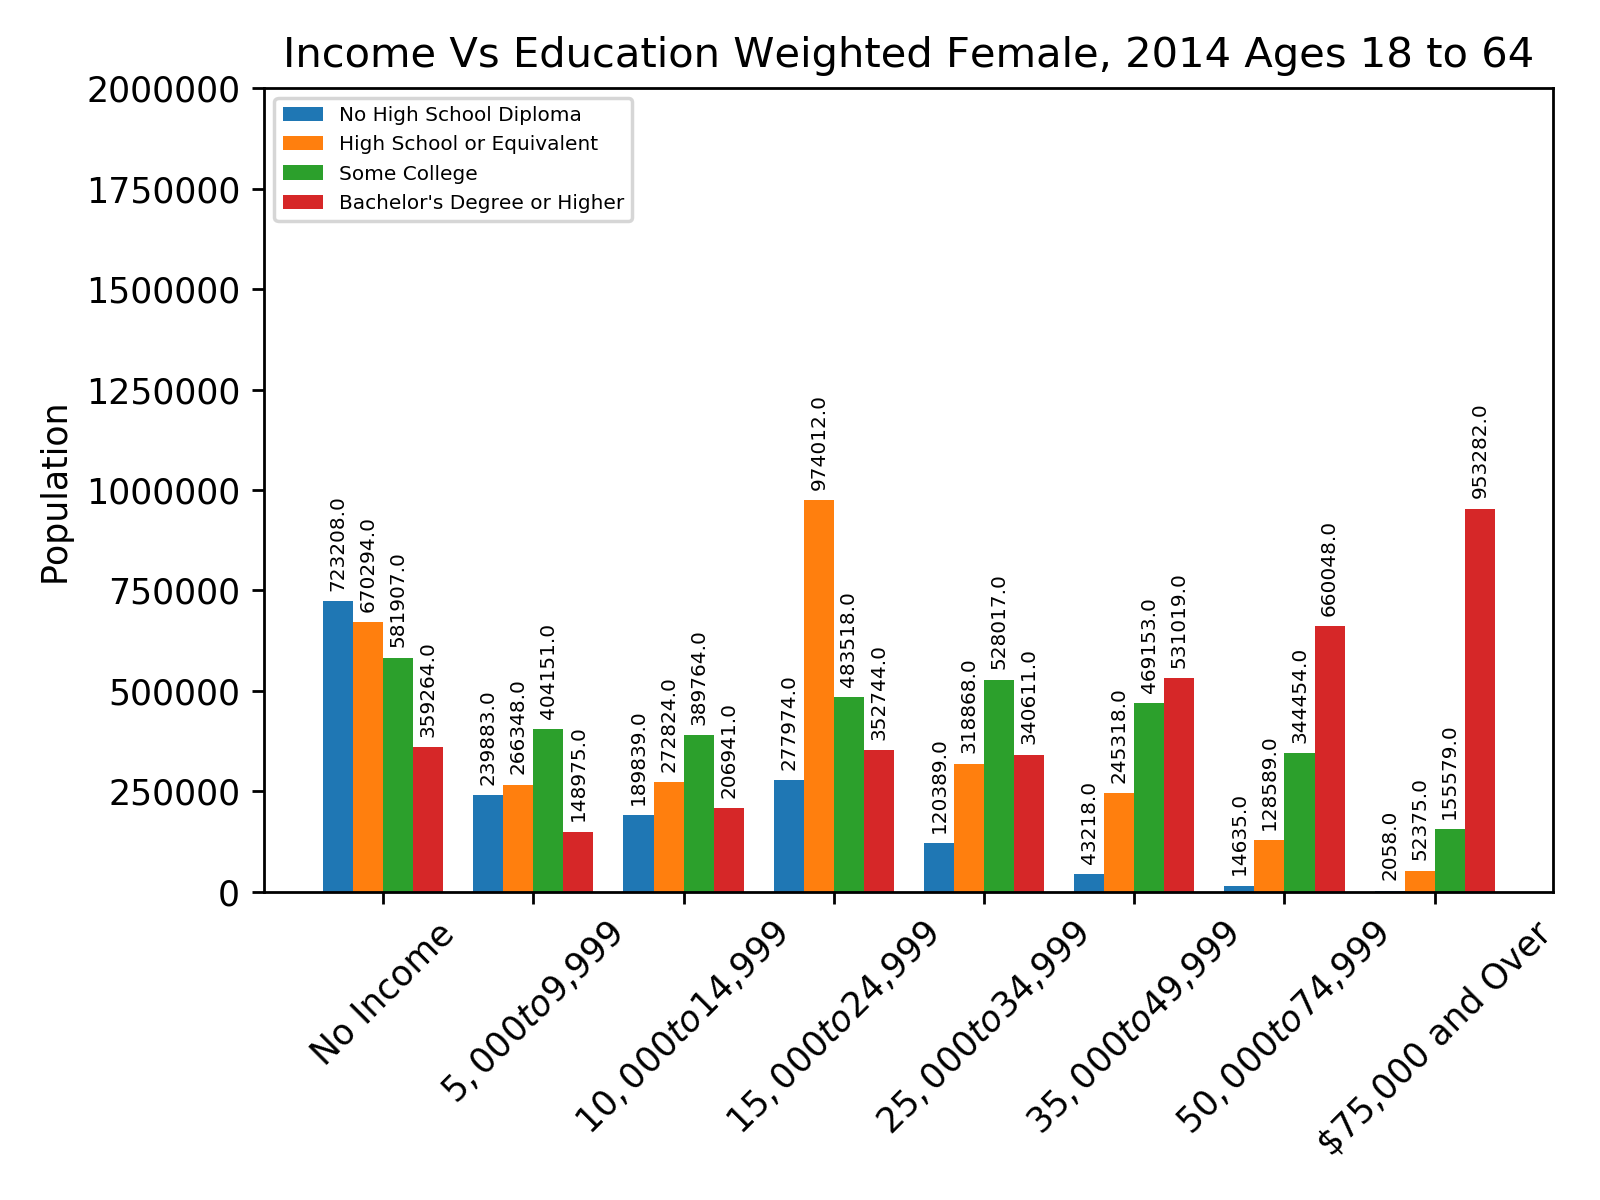

In [124]:
#create A bar graph based off model found on https://matplotlib.org/index.html

labels = ['No Income', '$5,000 to $9,999', '$10,000 to $14,999','$15,000 to $24,999',
          '$25,000 to $34,999', '$35,000 to $49,999', '$50,000 to $74,999', '$75,000 and Over']


x = np.arange(len(labels))  # the label locations
width = 0.40  # the width of the bars


fig, ax = plt.subplots()
rects1 = ax.bar(x - .3, no_hsF, .2, label='No High School Diploma')
rects2 = ax.bar(x - .1, hsF, .2, label='High School or Equivalent')
rects3 = ax.bar(x + .1, some_colF, .2, label='Some College')
rects4 = ax.bar(x + .3, bachF, .2, label="Bachelor's Degree or Higher")

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Population')
ax.set_title('Income Vs Education Weighted Female, 2014 Ages 18 to 64')
ax.set_xticks(x)
ax.set_xticklabels(labels)
#ax.set_ylimit([0,2500000]

ax.legend(loc='upper left', fontsize='xx-small')
plt.xticks(rotation=45)

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', rotation = '90',fontsize='xx-small')


autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)

plt.ylim(0, 2000000)
fig.tight_layout()
fig.savefig("output_education_and_income_Female_2014")
plt.show()

In [ ]:
#create A bar graph based off model found on https://matplotlib.org/index.html

labels = ['No Income', '$5,000 to $9,999', '$10,000 to $14,999','$15,000 to $24,999',
          '$25,000 to $34,999', '$35,000 to $49,999', '$50,000 to $74,999', '$75,000 and Over']


x = np.arange(len(labels))  # the label locations
width = 0.20  # the width of the bars


fig, ax = plt.subplots()
rects1 = ax.bar(x - .7, no_hsM, .2, label='No High School Diploma Male')
rects2 = ax.bar(x - .5, no_hsF, .2, label='No High School Diploma Female')
rects3 = ax.bar(x - .3, hsM, .2, label='High School or Equivalent Male')
rects4 = ax.bar(x - .1, hsF, .2, label='High School or Equivalent Female')
rects5 = ax.bar(x + .1, some_colM, .2, label='Some College Male')
rects6 = ax.bar(x + .3, some_colF, .2, label='Some College Female')
rects7 = ax.bar(x + .5, bachM, .2, label="Bachelor's Degree or Higher Male")
rects8 = ax.bar(x + .7, bachF, .2, label="Bachelor's Degree or Higher Female")


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Population')
ax.set_title('Weighted Male Population of CA by Education and Income in 2014 Ages 18 to 64')
ax.set_xticks(x)
ax.set_xticklabels(labels)
#ax.set_ylimit([0,2500000]

ax.legend(loc='best', fontsize='xx-small')
plt.xticks(rotation=45)

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', rotation = '90',fontsize='xx-small')


autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)
autolabel(rects5)
autolabel(rects6)
autolabel(rects7)
autolabel(rects8)

#axes.set_ylim([0,1800000])
#fig.tight_layout()
#fig.savefig("output_education_attainment/education_and_income_2008_18to64")
plt.show()

In [ ]:
#create A bar graph based off model found on https://matplotlib.org/index.html

labels = ['No Income', '$5,000 to $9,999', '$10,000 to $14,999','$15,000 to $24,999',
          '$25,000 to $34,999', '$35,000 to $49,999', '$50,000 to $74,999', '$75,000 and Over']


x = np.arange(len(labels))  # the label locations
width = 0.20  # the width of the bars


fig, ax = plt.subplots()
rects1 = ax.bar(x - .8, hsM, .2, label='High School or Equivalent Male')
rects2 = ax.bar(x - .5, hsF, .2, label='High School or Equivalent Female')
rects3 = ax.bar(x - .2, some_colM, .2, label='Some College Male')
rects4 = ax.bar(x + .2, some_colF, .2, label='Some College Female')
rects5 = ax.bar(x + .5, bachM, .2, label="Bachelor's Degree or Higher Male")
rects6 = ax.bar(x + .8, bachF, .2, label="Bachelor's Degree or Higher Female")


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Population')
ax.set_title("Both Gender Population by High Scool/Above and Income")
ax.set_xticks(x)
ax.set_xticklabels(labels)
#ax.set_ylimit([0,2500000]

ax.legend(loc='best', fontsize='xx-small')
plt.xticks(rotation=45)

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', rotation = '90',fontsize='xx-small')


autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)
autolabel(rects5)
autolabel(rects6)

#axes.set_ylim([0,1800000])
#fig.tight_layout()
#fig.savefig("output_education_attainment/education_and_income_2008_18to64")
plt.show()